In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           import pandas as pd

# Define the dataset
data = [
    ["Sunny", "Hot", "High", "Weak", "No"],
    ["Sunny", "Hot", "High", "Strong", "No"],
    ["Overcast", "Hot", "High", "Weak", "Yes"],
    ["Rain", "Mild", "High", "Weak", "Yes"],
    ["Rain", "Cool", "Normal", "Weak", "Yes"],
    ["Rain", "Cool", "Normal", "Strong", "No"],
    ["Overcast", "Cool", "Normal", "Strong", "Yes"],
    ["Sunny", "Mild", "High", "Weak", "No"],
    ["Sunny", "Cool", "Normal", "Weak", "Yes"],
    ["Rain", "Mild", "Normal", "Weak", "Yes"],
    ["Sunny", "Mild", "Normal", "Strong", "Yes"],
    ["Overcast", "Mild", "High", "Strong", "Yes"],
    ["Overcast", "Hot", "Normal", "Weak", "Yes"],
    ["Rain", "Mild", "High", "Strong", "No"]
]

# Define column names
columns = ["Outlook", "Temp", "Humidity", "Wind", "Decision"]

# Create and save the CSV file
df = pd.DataFrame(data, columns=columns)
df.to_csv("weather.csv", index=False)
print("CSV file 'weather.csv' created successfully!")


CSV file 'weather.csv' created successfully!


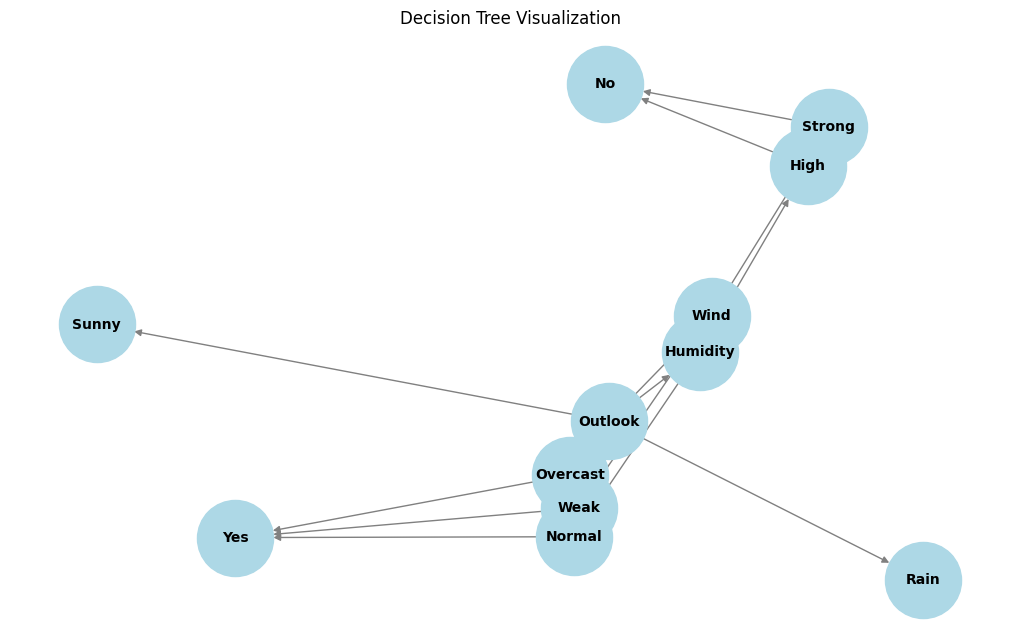

In [ ]:
import numpy as np
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Load data from CSV
df = pd.read_csv("weather.csv")

# Function to calculate entropy
def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count/total) * math.log2(count/total) for count in counts.values())

# Function to calculate information gain
def info_gain(df, feature, target):
    total_entropy = entropy(df[target])
    values, counts = np.unique(df[feature], return_counts=True)
    weighted_entropy = sum((counts[i]/sum(counts)) * entropy(df[df[feature] == values[i]][target]) for i in range(len(values)))
    return total_entropy - weighted_entropy

# ID3 Algorithm
def id3(df, features, target, parent_node=None, graph=None):
    if len(np.unique(df[target])) == 1:
        return np.unique(df[target])[0]
    if len(features) == 0:
        return Counter(df[target]).most_common(1)[0][0]

    gains = [info_gain(df, feature, target) for feature in features]
    best_feature = features[np.argmax(gains)]

    if graph is not None and parent_node is not None:
        graph.add_node(best_feature)
        graph.add_edge(parent_node, best_feature)

    tree = {best_feature: {}}
    for value in np.unique(df[best_feature]):
        sub_df = df[df[best_feature] == value].drop(columns=[best_feature])
        subtree = id3(sub_df, [feat for feat in features if feat != best_feature], target, best_feature, graph)
        tree[best_feature][value] = subtree

        if graph is not None:
            graph.add_node(value)
            graph.add_edge(best_feature, value)
            if isinstance(subtree, str):
                graph.add_node(subtree)
                graph.add_edge(value, subtree)

    return tree

# Create a graph for visualization
G = nx.DiGraph()
features = ["Outlook", "Temp", "Humidity", "Wind"]
tree = id3(df, features, "Decision", None, G)

# Plot the decision tree
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight="bold")
plt.title("Decision Tree Visualization")
plt.show()


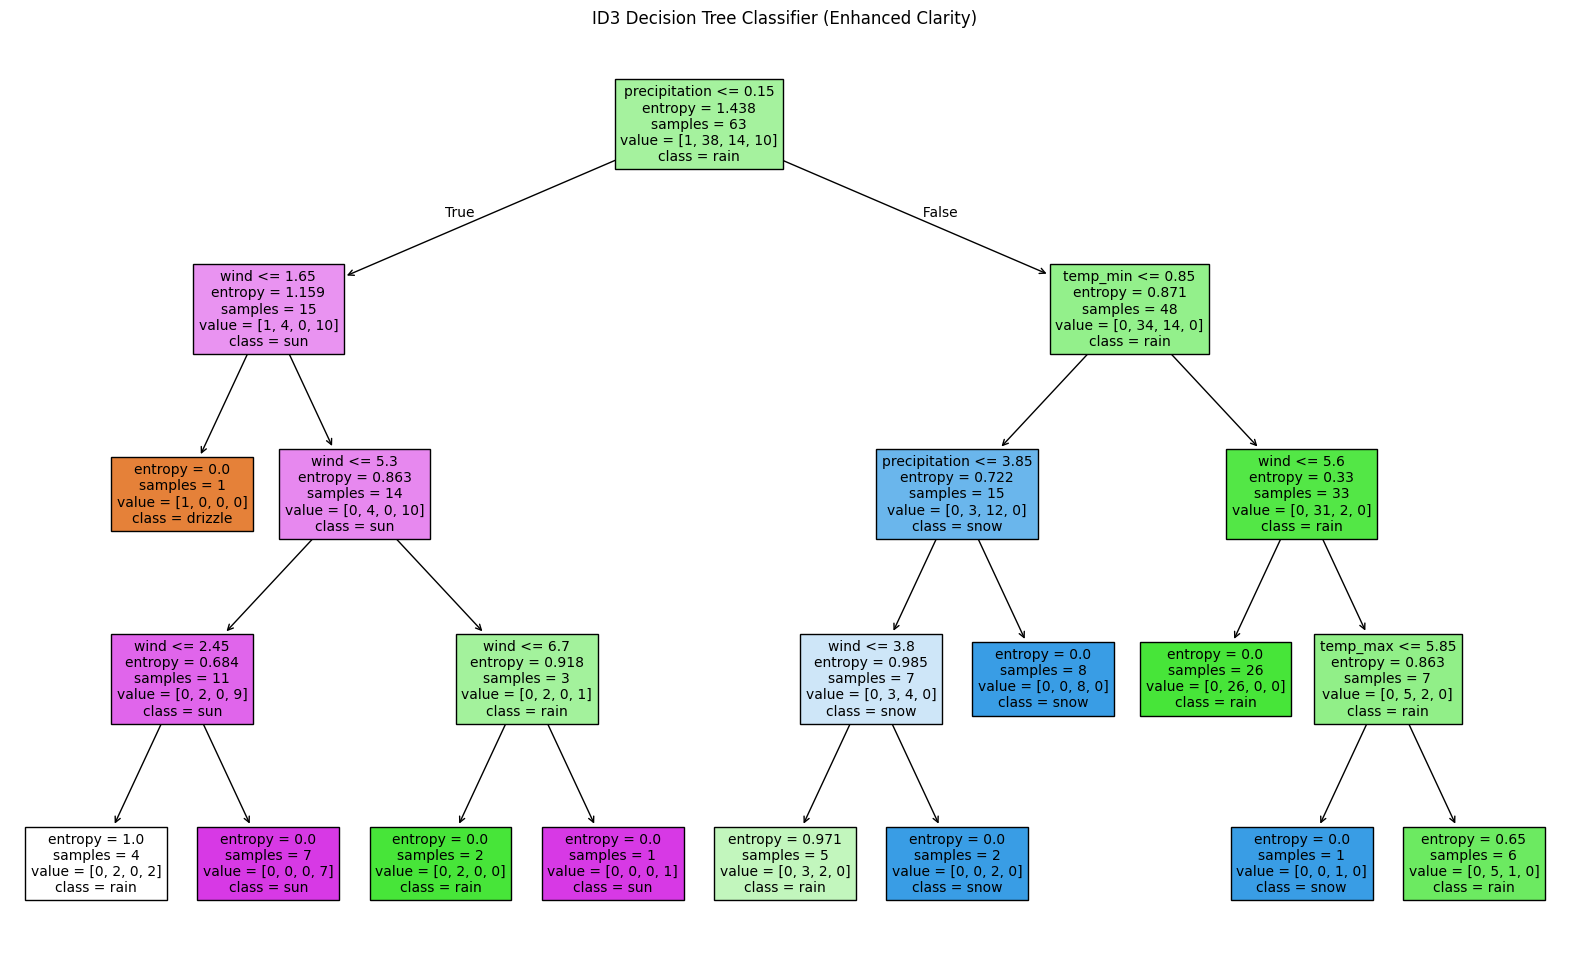

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the newly uploaded dataset
data = pd.read_csv('/content/seattle-weather.csv')

# Data Preparation
data_cleaned = data.drop('date', axis=1)
label_encoder = LabelEncoder()
data_cleaned['weather'] = label_encoder.fit_transform(data_cleaned['weather'])

# Split data into features and target
X = data_cleaned.drop('weather', axis=1)
y = data_cleaned['weather']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier with improved clarity
id3_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
id3_classifier.fit(X_train, y_train)

# Visualize the Decision Tree with larger font size for clarity
plt.figure(figsize=(20, 12))
tree.plot_tree(id3_classifier, feature_names=X.columns, class_names=list(label_encoder.classes_), filled=True, fontsize=10)
plt.title("ID3 Decision Tree Classifier (Enhanced Clarity)")
plt.show()